In [7]:
# import packages
import numpy as np
import pandas as pd

In [8]:
# load data and examine the data
df = pd.read_csv('/Users/kev/Desktop/NotSelfEmployed.csv')
# drop index column
df = df.drop(['Unnamed: 0'], axis=1)
shape = df.shape
print(shape[0], ' observations\n', shape[1], ' attributes')
df.head(10)

1146  observations
 27  attributes


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,What is your age?,Do you work remotely?,"What country do you work in?(1=United States of America, 0=Other)","What is your gender? (1=male, 0=female, other=0.5)"
0,3,1,0.0,0.0,0.0,0.5,1,0.0,0.0,0.5,...,0.0,0.0,0.0,1.0,0.0,1,39,0.5,0,1.0
1,2,1,0.0,1.0,1.0,1.0,2,0.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,1,29,0.0,1,1.0
2,2,1,0.0,0.0,0.0,0.5,3,0.5,0.0,0.5,...,0.5,0.5,0.0,0.5,0.0,0,38,1.0,0,1.0
3,2,0,1.0,0.0,0.0,0.0,3,1.0,0.5,0.5,...,0.5,1.0,1.0,1.0,1.0,1,43,0.5,1,0.0
4,6,1,1.0,0.0,1.0,1.0,2,1.0,1.0,0.5,...,0.5,1.0,0.0,0.0,1.0,0,42,0.5,0,1.0
5,3,1,0.5,0.0,0.0,0.5,2,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0,30,0.5,1,1.0
6,6,1,1.0,0.0,1.0,1.0,1,0.0,0.0,0.5,...,0.5,1.0,1.0,1.0,1.0,1,37,1.0,1,0.0
7,3,0,0.5,0.0,0.0,0.5,5,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1,44,0.5,1,0.0
8,3,1,1.0,1.0,1.0,1.0,1,0.0,0.0,0.5,...,0.5,1.0,0.5,1.0,1.0,1,28,0.0,1,1.0
9,4,0,1.0,0.0,0.5,0.5,4,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1,34,0.5,1,1.0


In [10]:
# split the two possible target attribute from the feature attribute
y_current = df['Do you currently have a mental health disorder?']
y_past = df['Have you had a mental health disorder in the past?']
xFeat = df.drop(['Do you currently have a mental health disorder?'], axis = 1)
print(y_current.head(10))
print(y_past.head(10))
shape = xFeat.shape
print(shape[0], ' observations\n', shape[1], ' attributes')
xFeat.head(10)

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Do you currently have a mental health disorder?, dtype: float64
0    1.0
1    1.0
2    0.5
3    1.0
4    0.0
5    0.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: Have you had a mental health disorder in the past?, dtype: float64
1146  observations
 26  attributes


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Do you have a family history of mental illness?,Have you had a mental health disorder in the past?,Have you been diagnosed with a mental health condition by a medical professional?,What is your age?,Do you work remotely?,"What country do you work in?(1=United States of America, 0=Other)","What is your gender? (1=male, 0=female, other=0.5)"
0,3,1,0.0,0.0,0.0,0.5,1,0.0,0.0,0.5,...,0.5,0.0,0.0,0.0,1.0,1,39,0.5,0,1.0
1,2,1,0.0,1.0,1.0,1.0,2,0.0,0.0,0.5,...,0.0,0.0,0.0,1.0,1.0,1,29,0.0,1,1.0
2,2,1,0.0,0.0,0.0,0.5,3,0.5,0.0,0.5,...,0.5,0.5,0.5,0.0,0.5,0,38,1.0,0,1.0
3,2,0,1.0,0.0,0.0,0.0,3,1.0,0.5,0.5,...,1.0,0.5,1.0,1.0,1.0,1,43,0.5,1,0.0
4,6,1,1.0,0.0,1.0,1.0,2,1.0,1.0,0.5,...,1.0,0.5,1.0,0.0,0.0,0,42,0.5,0,1.0
5,3,1,0.5,0.0,0.0,0.5,2,0.0,0.0,0.5,...,1.0,0.0,0.0,0.0,0.0,0,30,0.5,1,1.0
6,6,1,1.0,0.0,1.0,1.0,1,0.0,0.0,0.5,...,0.5,0.5,1.0,1.0,1.0,1,37,1.0,1,0.0
7,3,0,0.5,0.0,0.0,0.5,5,1.0,1.0,1.0,...,0.5,1.0,1.0,1.0,1.0,1,44,0.5,1,0.0
8,3,1,1.0,1.0,1.0,1.0,1,0.0,0.0,0.5,...,0.0,0.5,1.0,0.5,1.0,1,28,0.0,1,1.0
9,4,0,1.0,0.0,0.5,0.5,4,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1,34,0.5,1,1.0


In [11]:
# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# normalize the data in each attributed to 0 mean and unit variance before running PCA
scaler = StandardScaler()
scaler.fit(xFeat)
xFeat_normalized = scaler.transform(xFeat)
# print(xFeat_normalized[0:10, :])

# pca
pca = PCA().fit(xFeat_normalized)
print(pca.explained_variance_ratio_)
# principal attributes?
col = xFeat.columns
print(col[np.argmax(np.abs(pca.components_[0, :]))])
print(col[np.argmax(np.abs(pca.components_[1, :]))])
print(col[np.argmax(np.abs(pca.components_[2, :]))])

# leave 26 - 6 = 17 components and transform xFeat
pca = PCA(n_components=19)
pca.fit(xFeat_normalized)
xFeat_pca = pca.transform(xFeat_normalized)
# print(xFeat_pca[0:10, :])

[0.18143707 0.10440883 0.07578836 0.05475825 0.05063351 0.04796419
 0.04070118 0.03761784 0.0363471  0.03392879 0.03177584 0.031114
 0.02846465 0.02797185 0.02727863 0.02483369 0.02364216 0.0218395
 0.01929701 0.01748009 0.0168332  0.01587535 0.01456782 0.01338742
 0.01229641 0.00975723]
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Have you been diagnosed with a mental health condition by a medical professional?
How many employees does your company or organization have?


In [17]:
# import package
import seaborn as sns
from matplotlib import pyplot as plt

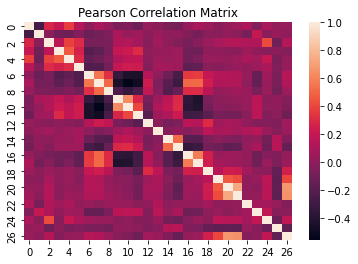

[3.06994196e-02 6.93753172e-04 1.28322019e-01 3.78867014e-02
 2.28888741e-02 2.83130531e-02 1.44834359e-01 1.19741964e-01
 4.81831000e-02 2.87547111e-02 4.96696873e-02 1.19955027e-01
 6.77157124e-02 4.39650191e-02 4.74140489e-02 1.55611152e-01
 2.10043352e-02 4.74393241e-02 2.50293957e-01 3.99843075e-01
 6.69372125e-01 6.52954848e-01 3.58972146e-02 8.93228418e-03
 1.75180420e-01 1.67441198e-01 1.00000000e+00]
[26 20 21 19 18 24 25 15  6  2 11  7 12 10  8 17 14 13  3 22  0  9  5  4
 16 23  1]
[20 21 19 18 24 25]
Index(['Have you had a mental health disorder in the past?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Do you have a family history of mental illness?',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
       'What country do you work in?(1=United States of America, 0=Other)',
       'What is your gender? (1=male, 0=female,

In [30]:
# Correlation Matrix
pcm = np.corrcoef(xFeat, y_current, rowvar=False)
# print(pcm)

# show heatmap
sns.heatmap(pcm)
plt.title("Pearson Correlation Matrix")
plt.savefig('pcm.png', dpi=300, bbox_inches='tight')
plt.show()

# 6 and 9 10 11; 7 and 9 10 11 highly correlated
# 25 most correlated to target attribute
target_corr = np.abs(pcm[:, -1])
print(target_corr)
ind = np.flip(np.argsort(target_corr))
print(ind)
n = 6
top_n = ind[1: n+1]
print(top_n)

columns = xFeat.columns
print(columns[top_n])

In [ ]:
# Clustering